In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:15<00:00, 87.6MB/s]
100% 1.06G/1.06G [00:15<00:00, 72.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators: ek sath sari images par kaam nahi karenge, chhote batches me karenge
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_data.map(process)

In [7]:
#cnn model

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [9]:
history = model.fit(train_ds,epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 104ms/step - accuracy: 0.5634 - loss: 2.5688 - val_accuracy: 0.6156 - val_loss: 0.7018
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6538 - loss: 0.6238 - val_accuracy: 0.6598 - val_loss: 0.6469
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.7043 - loss: 0.5735 - val_accuracy: 0.5818 - val_loss: 1.2720
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.7644 - loss: 0.4802 - val_accuracy: 0.8002 - val_loss: 0.4497
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.7856 - loss: 0.4232 - val_accuracy: 0.7598 - val_loss: 0.4959
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8075 - loss: 0.3757 - val_accuracy: 0.6394 - val_loss: 0.7039
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8285 - loss: 0.3275 - val_accuracy: 0.8118 - val_loss: 0.4675
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.8492 - loss: 0.2763 -

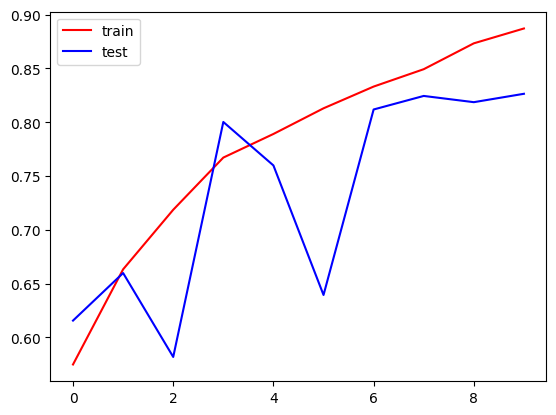

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'test')
plt.legend()
plt.show()

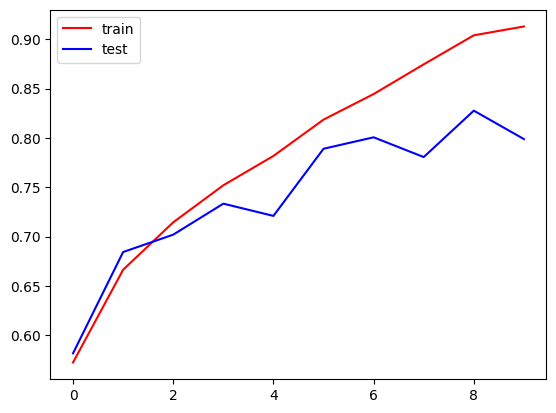

In [ ]:
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color= 'blue',label = 'test')
plt.legend()
plt.show()

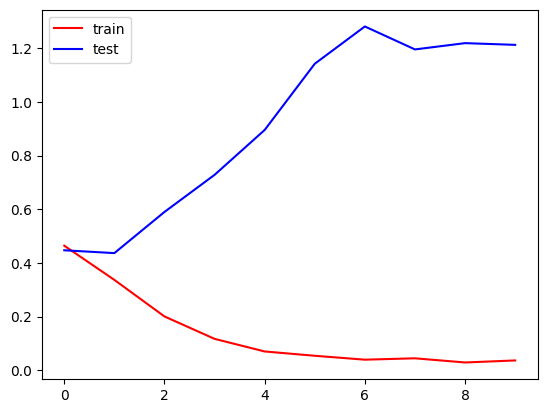

In [ ]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'test')
plt.legend()
plt.show()

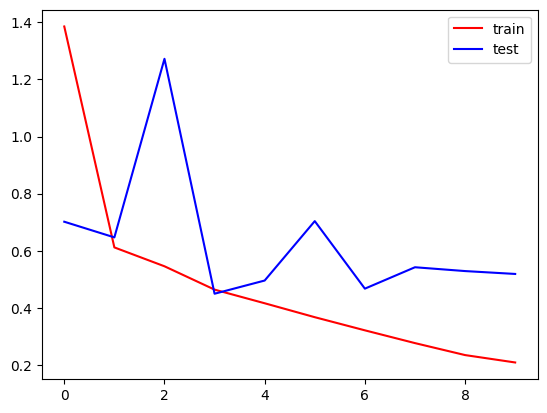

In [27]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'test')
plt.legend()
plt.show()

In [13]:
import cv2

In [14]:
test_image = cv2.imread('/content/cat1.jpg')

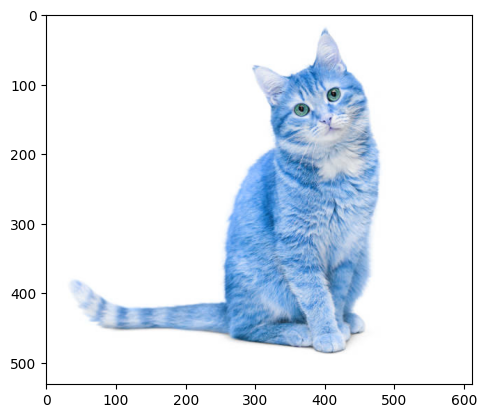

In [15]:
plt.imshow(test_image)

In [16]:
test_image.shape

(531, 612, 3)

In [17]:
test_img = cv2.resize(test_image,(256,256))

In [18]:
test_input = test_img.reshape((1,256,256,3))

In [19]:
prediction = model.predict(test_input)
if prediction ==0:
  print('it is a cat')
else:
  print('it is a dog')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
it is a cat


In [20]:
test_img = cv2.imread('/content/dog.jpg')

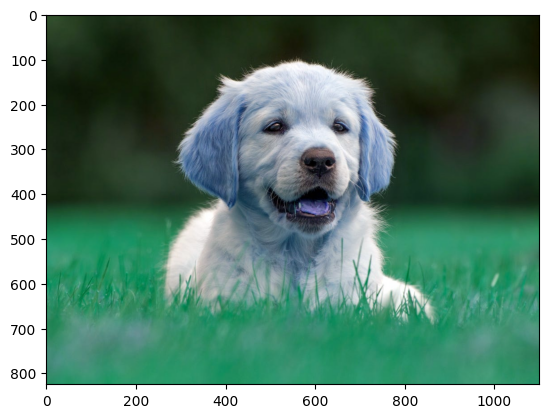

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(825, 1100, 3)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
prediction = model.predict(test_input)
if prediction ==0:
  print('it is a cat')
else:
  print('it is a dog')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
it is a dog
